In [1]:
#------------------------------------------------------------------------------------
import numpy as np
import pycuda.gpuarray as gpuarray
from pycuda.tools import make_default_context
import matplotlib as matplotlib
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D


#-------------------------------------------------------------------------------------
from pywignercuda_path import SetPyWignerCUDA_Path
SetPyWignerCUDA_Path()
from GPU_Dirac3D import *


In [2]:
#import pyqtgraph as pg

In [3]:
%matplotlib inline

In [4]:
class DefinePotential_Dirac3D( GPU_Dirac3D ):
    def __init__ (self):
        #....................Defining the geometry.....................................    
        gridDIM_X = 256
        gridDIM_Y = 256
        gridDIM_Z = 256
        
        X_amplitude =15
        Y_amplitude =12
        Z_amplitude =12
        
        dt = 0.01

        timeSteps =  200
        skipFrames =  10
        #...................Defining the kinematic-dynamical constants.................
        self.mass = 1.
        self.c = 1.
        self.hBar = 1.
        #...................Defining the potential and initial state parameters........
        hBar = 1
    
        self.px = 1.
        self.py = 0.
        self.pz = 0.
        
        self.energy = self.c*np.sqrt( (self.mass*self.c)**2 +  self.px**2 + self.py**2 + self.pz**2  )
        #...................Defining the potential.....................................
       
        self.Potential_0_String = '0.'
        
        self.Potential_1_String = '0.'
        
        self.Potential_2_String = '0.'
        
        self.Potential_3_String = '0.'
        
        #..................Defining the output directory/file .........................
        self.fileName =  '/home/rcabrera/DATA/Dirac3D/Free.hdf5'

        self.Compute_Ehrenfest_P = True
        #..............................................................................	

        amplitude = (X_amplitude,Y_amplitude,Z_amplitude)
        gridDIM   = (gridDIM_X,gridDIM_Y,gridDIM_Z)

        self.Compute_Ehrenfest_P = True

        GPU_Dirac3D.__init__( self,gridDIM, amplitude ,dt,timeSteps, skipFrames = skipFrames,frameSaveMode='Spinor')

        
    def Set_Initial_Condition_SpinUp (self):

        def gaussian(x,y,z):
            return np.exp( - ( (x)**2 + y**2 + z**2)/4. )
        
        self.Psi_init = self.Spinor_Particle_SpinUp(  (self.px,self.py,self.pz) , gaussian )
        
        #norm = self.Norm_X_CPU( self.Psi_init )
        norm = self.Norm( self.Psi_init )
        
        #self.FilterElectrons(1) 
        
        self.Psi_init /= norm  
        
        
    def Set_Initial_Condition_SpinDown (self):

        def gaussian(x,y,z):
            return np.exp( - ( x**2 + y**2 + z**2)/4. )
        
        self.Psi_init = self.Spinor_Particle_SpinDown(  (self.px,self.py,self.pz) , gaussian )
        
        #norm = self.Norm_X_CPU( self.Psi_init )
        norm = self.Norm( self.Psi_init )
        
        self.Psi_init /= norm  
        

In [5]:
instance = DefinePotential_Dirac3D()

In [6]:
instance = DefinePotential_Dirac3D()

instance.Set_Initial_Condition_SpinUp()

#instance_Dirac3D.FilterElectrons(1)

print '                                      '
print ' dx = ', instance.dX

Psi_end = instance.Run ()

                                      
 dx =  0.1171875
--------------------------------------------
              Dirac Propagator 3D           
--------------------------------------------
  save Mode  =   Spinor
         GPU memory Total        5.24945068359 GB
         GPU memory Free         2.55571746826 GB
                                                               
number of steps  =   200  dt =  0.01
dX =  0.1171875 dY =  0.09375 dZ =  0.09375
dPx =  0.209439510239 dPy =  0.261799387799 dPz =  0.261799387799
                                                               
  
 progress  0 %
 norm step 1 =  15291.3546282
 progress  4 %
 progress  9 %
 progress  14 %
 progress  19 %
 progress  24 %
 progress  29 %
 progress  34 %
 progress  39 %
 progress  44 %
 progress  49 %
 progress  54 %
 progress  59 %
 progress  64 %
 progress  69 %
 progress  74 %
 progress  79 %
 progress  84 %
 progress  89 %
 progress  94 %
 progress  99 %
 computational time  =  182.287054062


In [7]:
instance.Psi_end.shape

(4, 256, 256, 256)

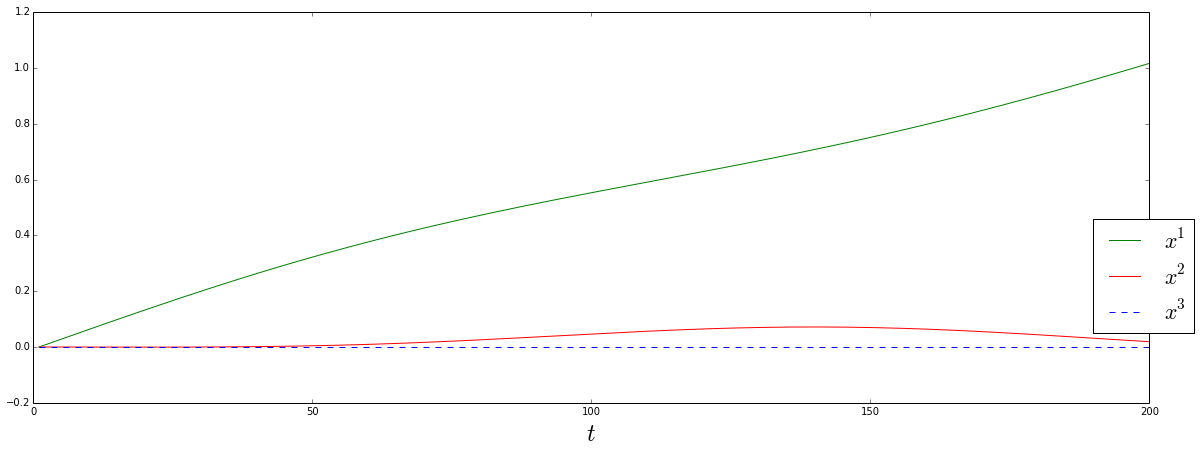

In [8]:
axis_font = {'size':'24'}

fig, ax = plt.subplots(figsize=(20, 7))

ax.plot( instance.timeRange ,  instance.X_average   , 'g',label= '$x^1 $')

ax.plot( instance.timeRange ,  instance.Y_average   , 'r',label= '$x^2 $')

ax.plot( instance.timeRange ,  instance.Z_average   , 'b--',label= '$x^3 $')


ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

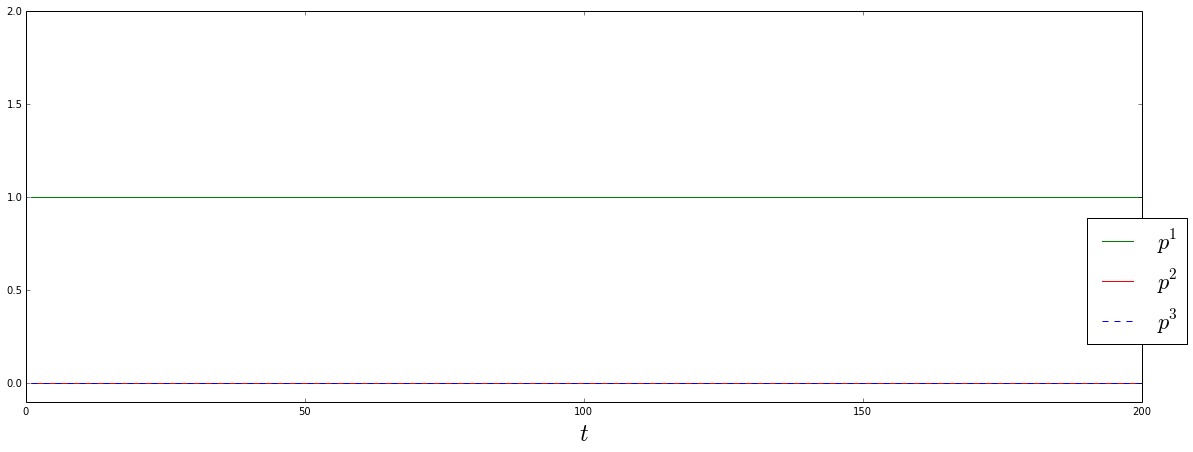

In [9]:
if instance.Compute_Ehrenfest_P == True:
    axis_font = {'size':'24'}
    
    fig, ax = plt.subplots(figsize=(20, 7))
    
    ax.plot( instance.timeRange ,  instance.Px_average   , 'g',label= '$p^1 $')
    
    ax.plot( instance.timeRange ,  instance.Py_average   , 'r',label= '$p^2 $')
    
    ax.plot( instance.timeRange ,  instance.Pz_average   , 'b--',label= '$p^3 $')
    
    ax.set_ylim(-0.1,2)
    
    ax.set_xlabel(r'$t$',**axis_font)
    
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

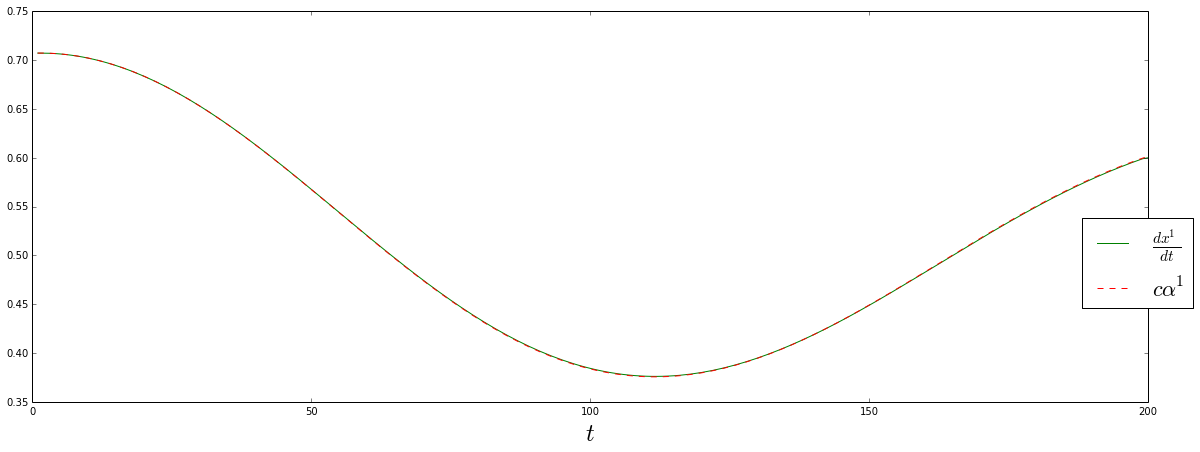

In [10]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))

ax.plot( instance.timeRange ,  np.gradient( instance.X_average , instance.dt)  , 'g',
        label= '$\\frac{dx^1}{dt} $')

ax.plot( instance.timeRange ,  instance.Alpha1_average ,'r--' ,label='$c \\alpha^1$')

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

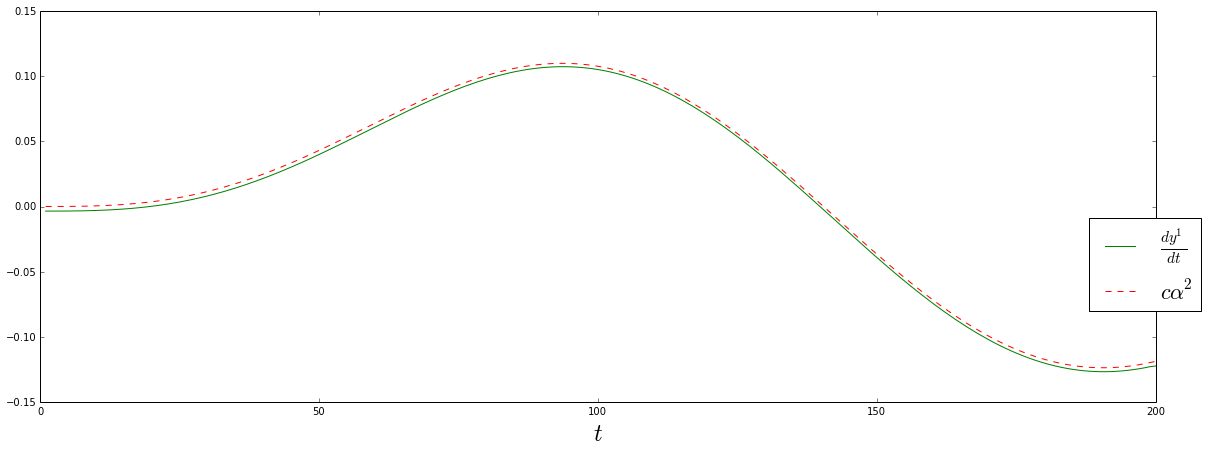

In [11]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))

ax.plot( instance.timeRange ,  np.gradient( instance.Y_average , instance.dt)  , 'g',
        label= '$\\frac{dy^1}{dt} $')

ax.plot( instance.timeRange ,  instance.Alpha2_average ,'r--' ,label='$c \\alpha^2$')

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

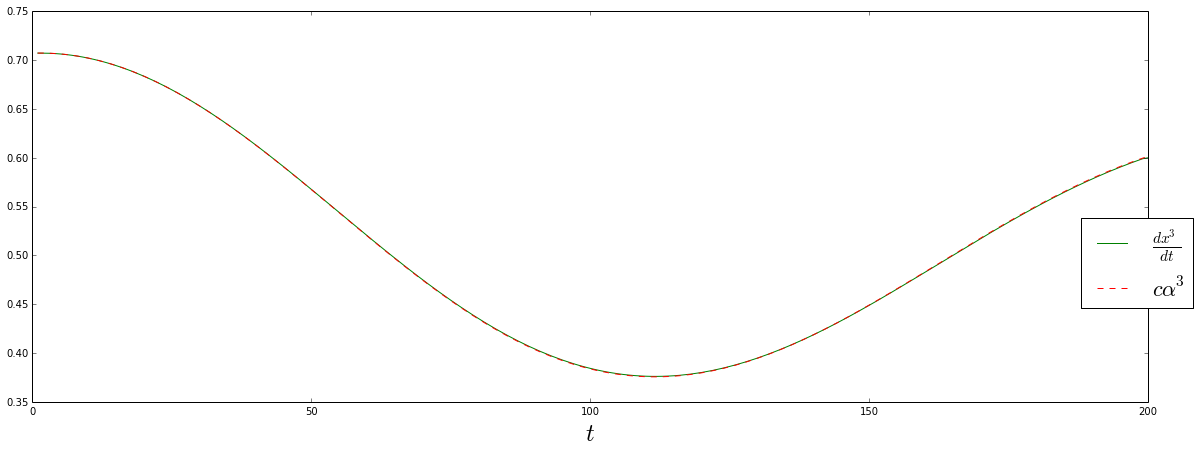

In [12]:
axis_font = {'size':'24'}


fig, ax = plt.subplots(figsize=(20, 7))

ax.plot( instance.timeRange ,  np.gradient( instance.X_average , instance.dt)  , 'g',
        label= '$\\frac{dx^3}{dt} $')

ax.plot( instance.timeRange ,  instance.Alpha1_average ,'r--' ,label='$c \\alpha^3$')

ax.set_xlabel(r'$t$',**axis_font)

ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

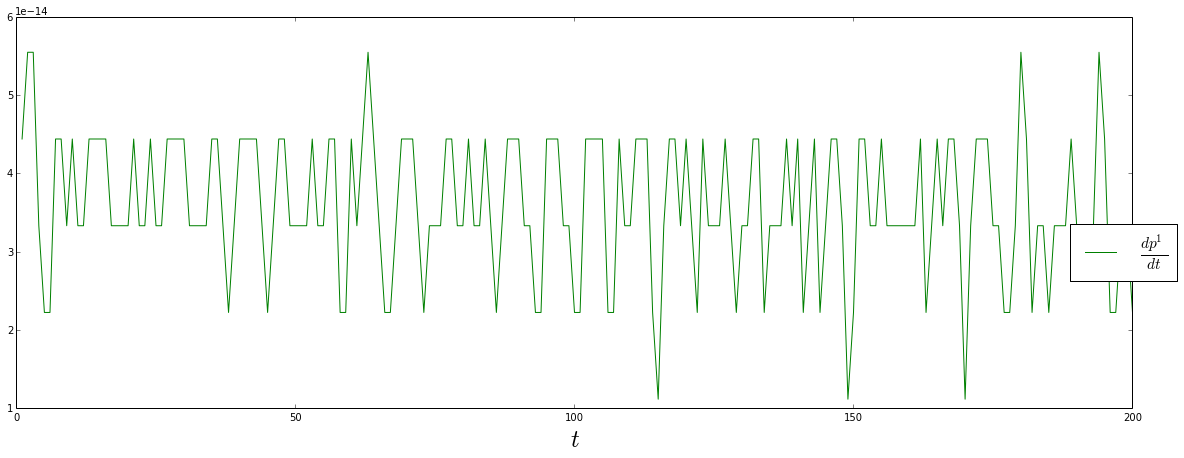

In [13]:
if instance.Compute_Ehrenfest_P == True:
    
    axis_font = {'size':'24'}
    
    fig, ax = plt.subplots(figsize=(20, 7))
    
    ax.plot( instance.timeRange ,  np.gradient( instance.Px_average , instance.dt)  , 'g',
            label= '$\\frac{dp^1}{dt} $')
    
    
    ax.set_xlabel(r'$t$',**axis_font)
    
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

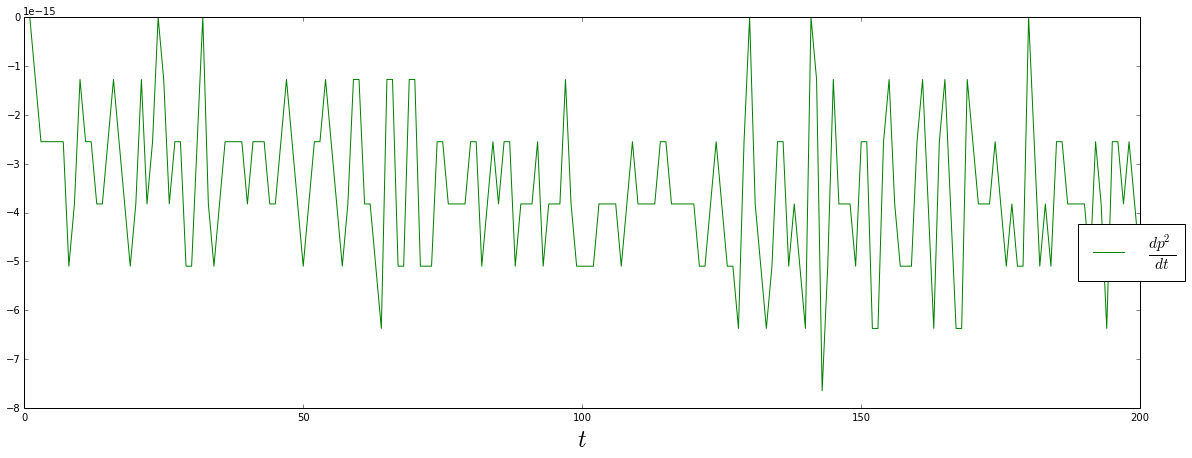

In [14]:
if instance.Compute_Ehrenfest_P == True:
    
    axis_font = {'size':'24'}
    
    fig, ax = plt.subplots(figsize=(20, 7))
    
    ax.plot( instance.timeRange ,  np.gradient( instance.Py_average , instance.dt)  , 'g',
            label= '$\\frac{dp^2}{dt} $')
    
    
    ax.set_xlabel(r'$t$',**axis_font)
    
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

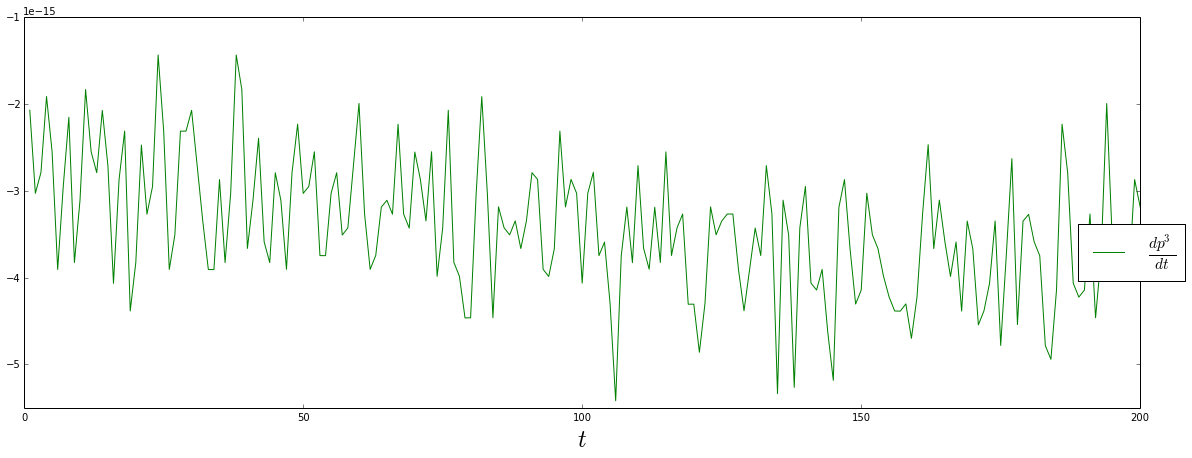

In [15]:
if instance.Compute_Ehrenfest_P == True:
    
    axis_font = {'size':'24'}
    
    fig, ax = plt.subplots(figsize=(20, 7))
    
    ax.plot( instance.timeRange ,  np.gradient( instance.Pz_average , instance.dt)  , 'g',
            label= '$\\frac{dp^3}{dt} $')
    
    
    ax.set_xlabel(r'$t$',**axis_font)
    
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

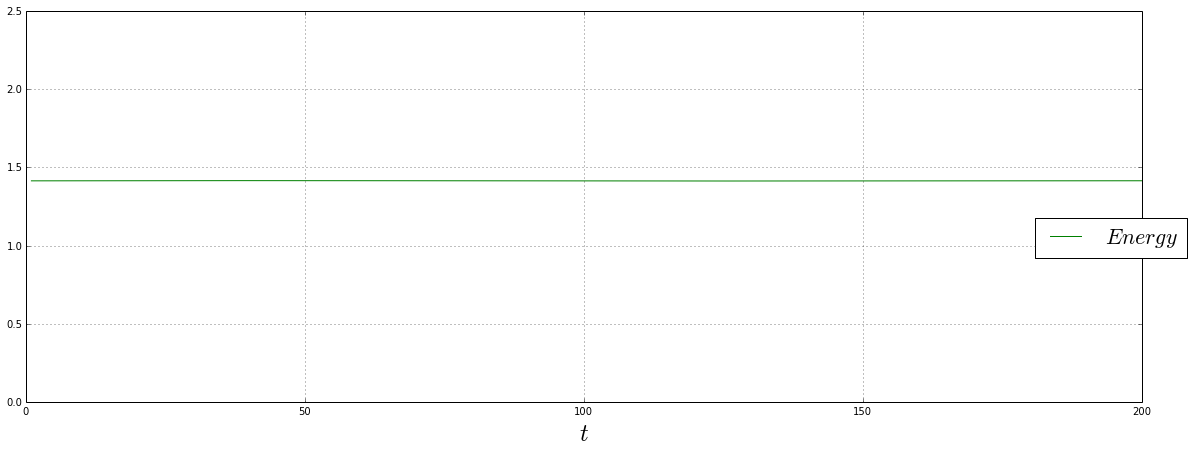

In [16]:
if instance.Compute_Ehrenfest_P == True:
    
    axis_font = {'size':'24'}
    
    fig, ax = plt.subplots(figsize=(20, 7))
    
    ax.plot( instance.timeRange ,  instance.K_Energy_average + instance.Potential_0_average , 'g',
            label= '$ Energy$')
    
    ax.set_ylim(0,2.5)
    
    ax.set_xlabel(r'$t$',**axis_font)
    
    ax.grid('on')
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc=1, prop={'size':22})

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


(-0.1, 0.1)

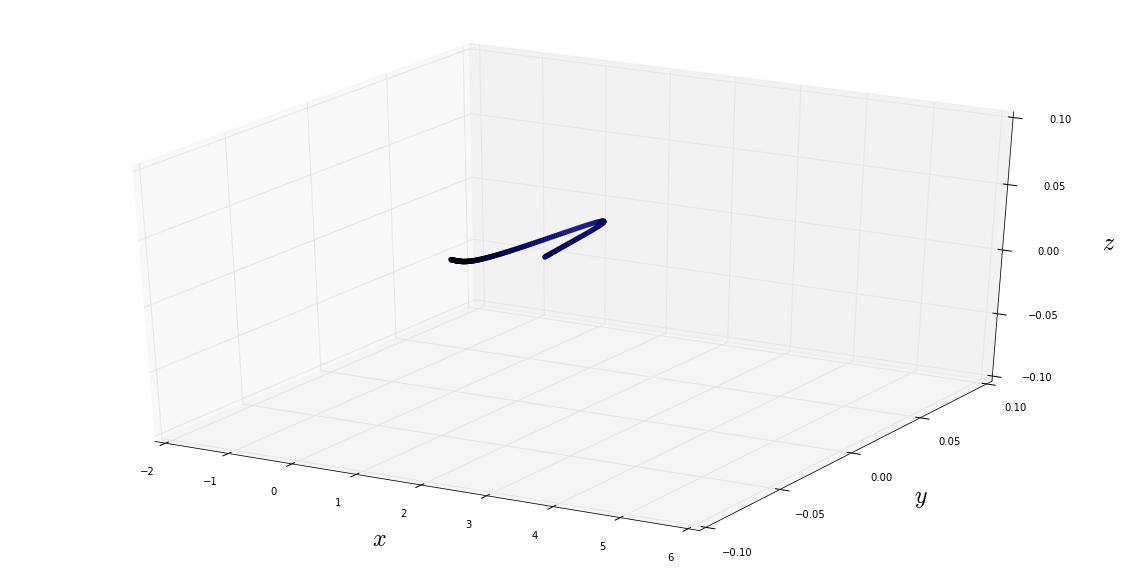

In [17]:

fig, ax = plt.subplots(figsize=(20, 10))


ax = fig.gca(projection='3d')

ax.scatter(
            instance.X_average,
            instance.Y_average,
            instance.Z_average
            )

ax.set_xlabel(r'$x$',**axis_font)

ax.set_ylabel(r'$y$',**axis_font)

ax.set_zlabel(r'$z$',**axis_font)

ax.set_xlim(-2 ,6)
ax.set_ylim(-0.1,0.1)
ax.set_zlim(-0.1,0.1)